# Project Title :
-- Academic Performance & Student Behavior Insights
### Project Overview :
-- The goal is to understand what factors most influence student academic performance and provide actionable insights for educators and policymakers to improve student outcomes.
### Problem Statement
What factors impact student academic performance the most, and how can schools use data-driven insights to improve grades and engagement?


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import warnings
warnings.filterwarnings('ignore')

# Loading the Dataset
### Description

This dataset includes student-level data about their demographic background, school performance, study time, family situation, and alcohol consumption. It allows exploration of academic performance predictors and behavioral patterns.

In [2]:
df = pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Initial Exporation

In [3]:
df.size    # checking the size of the dataset 

8000

In [4]:
df.shape   # checking the shape of the dataset 

(1000, 8)

In [5]:
df.nunique()  # checking the count of unique values in each column

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [6]:
df.isnull().sum()    # checking the sum of null values in each column

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [9]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [10]:
df.duplicated().sum()

0

## Renaming the columns

In [11]:
df.rename(columns={
    'race/ethnicity': 'race_ethnicity',
    'parental level of education': 'parental_education',
    'test preparation course': 'test_preparation',
    'math score': 'math_score',
    'reading score': 'reading_score',
    'writing score': 'writing_score'
}, inplace=True)

df.head()

,gender,race_ethnicity,parental_education,lunch,test_preparation,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Adding new columns 

In [12]:
df['average_score'] = df[['math_score', 'reading_score', 'writing_score']].mean(axis=1).round(2)
df.head()

,gender,race_ethnicity,parental_education,lunch,test_preparation,math_score,reading_score,writing_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67
1,female,group C,some college,standard,completed,69,90,88,82.33
2,female,group B,master's degree,standard,none,90,95,93,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33
4,male,group C,some college,standard,none,76,78,75,76.33


In [13]:
# Adding new column - alcohol_consumption( low / moderate / high)

def alcohol_consumption(score):
    if score >= 70:
        return 'Low'
    elif 30 <= score < 70:
        return 'Moderate'
    else:
        return 'High'

df['alcohol_consumption'] = df['average_score'].apply(alcohol_consumption)
df.head()


,gender,race_ethnicity,parental_education,lunch,test_preparation,math_score,reading_score,writing_score,average_score,alcohol_consumption
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67,Low
1,female,group C,some college,standard,completed,69,90,88,82.33,Low
2,female,group B,master's degree,standard,none,90,95,93,92.67,Low
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33,Moderate
4,male,group C,some college,standard,none,76,78,75,76.33,Low


In [14]:
# Adding new column - family_support (yes/no)

def family_support(score):
    if score >= 70:
        return 'Yes'
    else:
        return 'No'

df['family_support'] = df['average_score'].apply(family_support)
df.head()

,gender,race_ethnicity,parental_education,lunch,test_preparation,math_score,reading_score,writing_score,average_score,alcohol_consumption,family_support
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67,Low,Yes
1,female,group C,some college,standard,completed,69,90,88,82.33,Low,Yes
2,female,group B,master's degree,standard,none,90,95,93,92.67,Low,Yes
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33,Moderate,No
4,male,group C,some college,standard,none,76,78,75,76.33,Low,Yes


In [15]:
# Adding new column - internet_access(yes/no)

def internet_access(score):
    return 'Yes' if score >= 60 else 'No'

df['internet_access'] = df['average_score'].apply(internet_access)
df.head()

,gender,race_ethnicity,parental_education,lunch,test_preparation,math_score,reading_score,writing_score,average_score,alcohol_consumption,family_support,internet_access
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67,Low,Yes,Yes
1,female,group C,some college,standard,completed,69,90,88,82.33,Low,Yes,Yes
2,female,group B,master's degree,standard,none,90,95,93,92.67,Low,Yes,Yes
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33,Moderate,No,No
4,male,group C,some college,standard,none,76,78,75,76.33,Low,Yes,Yes


In [16]:
# Adding new column - study_time_hours (hours between 2 and 8 based on score)

def study_time(score):
    if score >= 85:
        return 8
    elif score >= 70:
        return 6
    elif score >= 55:
        return 4
    else:
        return 2

df['avg_studytime(hrs)'] = df['average_score'].apply(study_time)
df.head()

,gender,race_ethnicity,parental_education,lunch,test_preparation,math_score,reading_score,writing_score,average_score,alcohol_consumption,family_support,internet_access,avg_studytime(hrs)
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67,Low,Yes,Yes,6
1,female,group C,some college,standard,completed,69,90,88,82.33,Low,Yes,Yes,6
2,female,group B,master's degree,standard,none,90,95,93,92.67,Low,Yes,Yes,8
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33,Moderate,No,No,2
4,male,group C,some college,standard,none,76,78,75,76.33,Low,Yes,Yes,6


In [17]:
# Adding new column -  grade (A /B /C /D /E /F) based on the avg_score

def grade(score):
    if score >= 90:
        return 'A'
    elif score >= 80:
        return 'B'
    elif score >= 70:
        return 'C'
    elif score >= 60:
        return 'D'
    elif score >= 50:
        return 'E'
    else:
        return 'F'

df['grade'] = df['average_score'].apply(grade)
df.head()


,gender,race_ethnicity,parental_education,lunch,test_preparation,math_score,reading_score,writing_score,average_score,alcohol_consumption,family_support,internet_access,avg_studytime(hrs),grade
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67,Low,Yes,Yes,6,C
1,female,group C,some college,standard,completed,69,90,88,82.33,Low,Yes,Yes,6,B
2,female,group B,master's degree,standard,none,90,95,93,92.67,Low,Yes,Yes,8,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33,Moderate,No,No,2,F
4,male,group C,some college,standard,none,76,78,75,76.33,Low,Yes,Yes,6,C


In [18]:
# Adding new column -  absent_percentage based on the avg_score

def absent_percent(score):
    if score >= 85:
        return random.randint(0, 10)
    elif score >= 70:
        return random.randint(10, 20)
    elif score >= 50:
        return random.randint(20, 35)
    else:
        return random.randint(35, 50)

df['absent_percent'] = df['average_score'].apply(absent_percent)
df.head()

,gender,race_ethnicity,parental_education,lunch,test_preparation,math_score,reading_score,writing_score,average_score,alcohol_consumption,family_support,internet_access,avg_studytime(hrs),grade,absent_percent
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67,Low,Yes,Yes,6,C,15
1,female,group C,some college,standard,completed,69,90,88,82.33,Low,Yes,Yes,6,B,16
2,female,group B,master's degree,standard,none,90,95,93,92.67,Low,Yes,Yes,8,A,2
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33,Moderate,No,No,2,F,37
4,male,group C,some college,standard,none,76,78,75,76.33,Low,Yes,Yes,6,C,13


## Now we have our dataset with all the necessary columns
-- Now after completing all the initial steps of data loading , understanding , cleaning , renaming and adding new colmuns we have our cleaned dataset.

In [19]:
 df.to_csv('cleaned_std_perf.csv', index=False)


 # Univariate Analysis
-- In particular, we will:

- Analyze the numerical columns using histograms and summary statistics

- Analyze the categorical columns using countplots

- Use boxplots to visually check for outliers in the numerical columns

math_score Summary:
count    1000.00000
mean       66.08900
std        15.16308
min         0.00000
25%        57.00000
50%        66.00000
75%        77.00000
max       100.00000
Name: math_score, dtype: float64


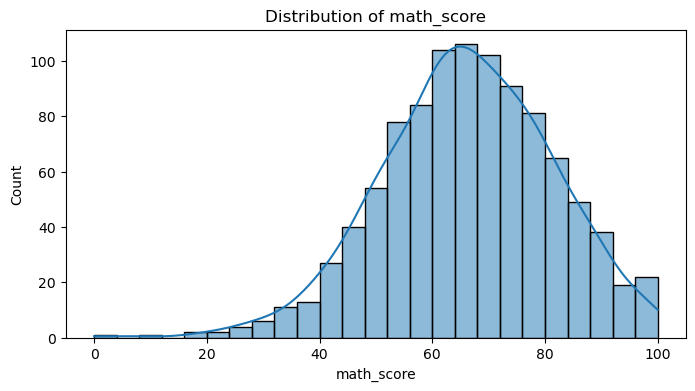

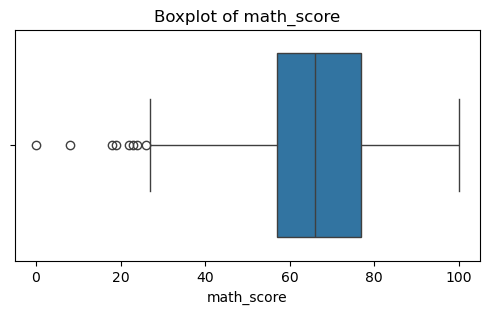

reading_score Summary:
count    1000.000000
mean       69.169000
std        14.600192
min        17.000000
25%        59.000000
50%        70.000000
75%        79.000000
max       100.000000
Name: reading_score, dtype: float64


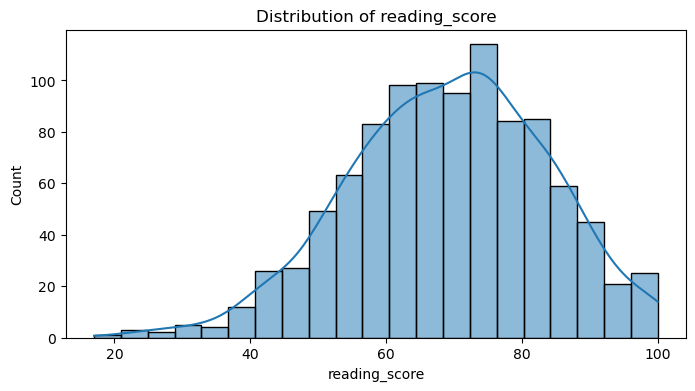

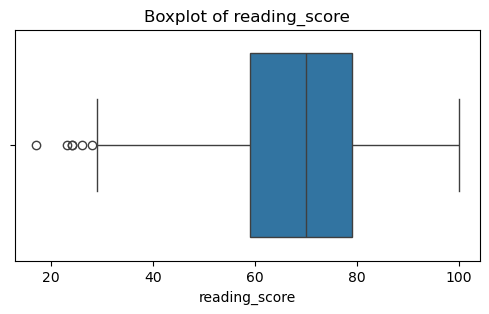

writing_score Summary:
count    1000.000000
mean       68.054000
std        15.195657
min        10.000000
25%        57.750000
50%        69.000000
75%        79.000000
max       100.000000
Name: writing_score, dtype: float64


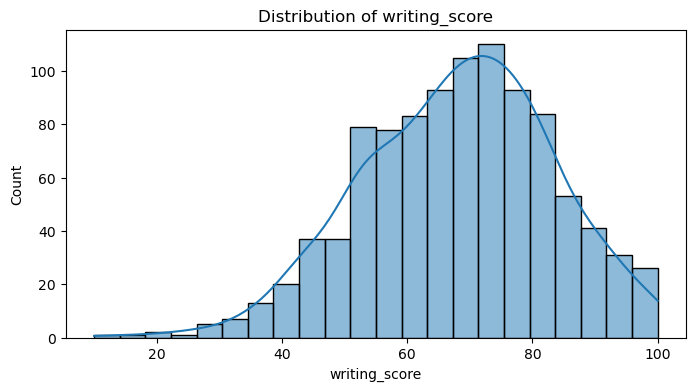

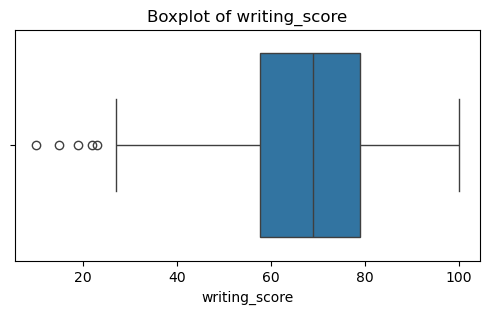

average_score Summary:
count    1000.000000
mean       67.770580
std        14.257311
min         9.000000
25%        58.330000
50%        68.330000
75%        77.670000
max       100.000000
Name: average_score, dtype: float64


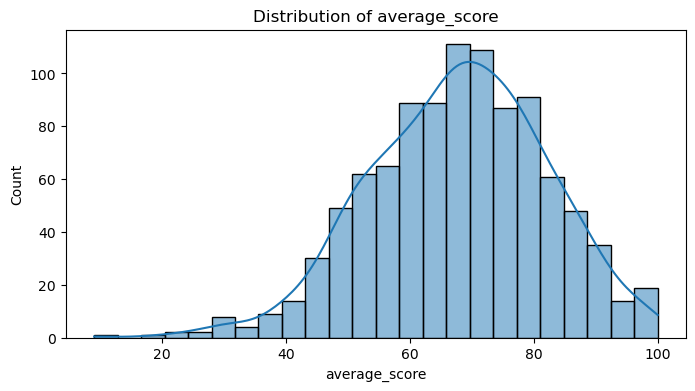

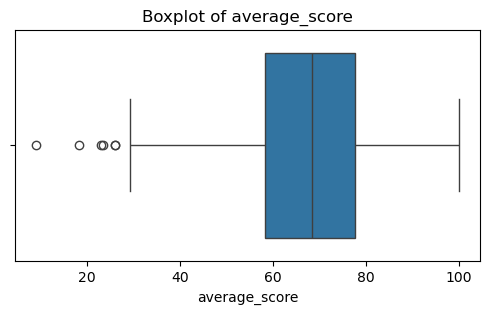

avg_studytime(hrs) Summary:
count    1000.000000
mean        4.768000
std         1.845422
min         2.000000
25%         4.000000
50%         4.000000
75%         6.000000
max         8.000000
Name: avg_studytime(hrs), dtype: float64


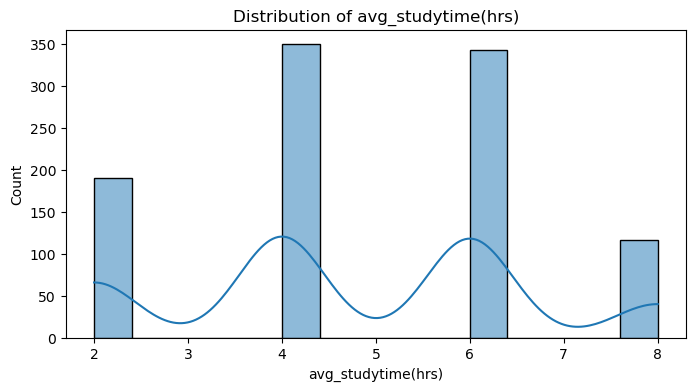

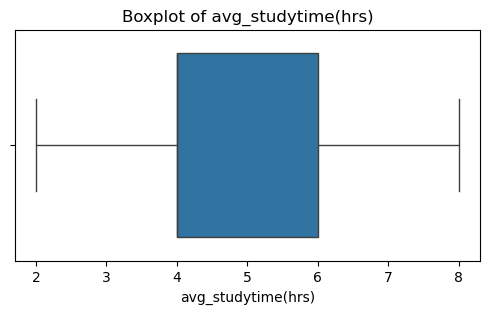

absent_percent Summary:
count    1000.000000
mean       21.763000
std        10.944799
min         0.000000
25%        14.000000
50%        21.000000
75%        30.000000
max        50.000000
Name: absent_percent, dtype: float64


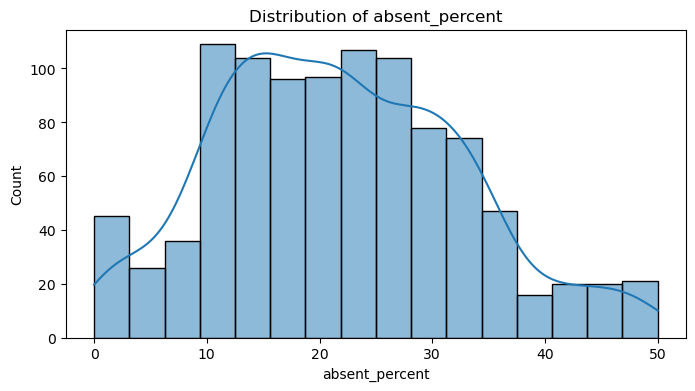

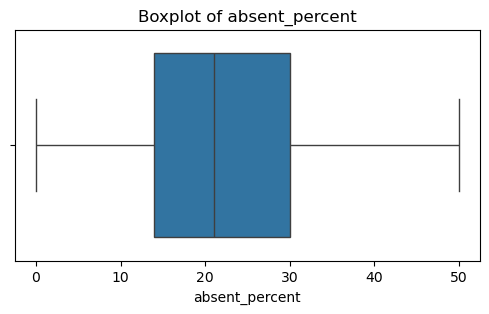

In [20]:
# for numeric columns:

numeric_cols = df.select_dtypes(include='number').columns

for col in numeric_cols:
    print(f"{col} Summary:")
    print(df[col].describe())

    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

Value counts for gender:
gender
female    518
male      482
Name: count, dtype: int64


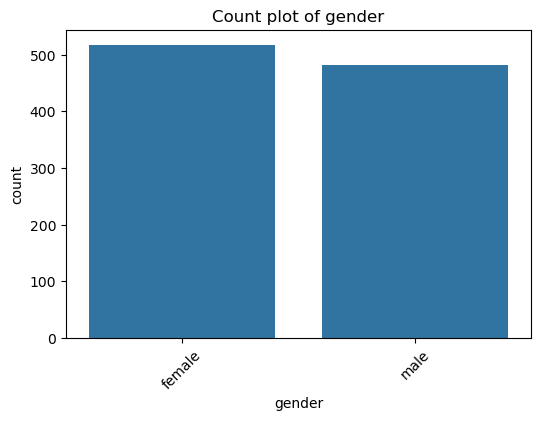

Value counts for race_ethnicity:
race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64


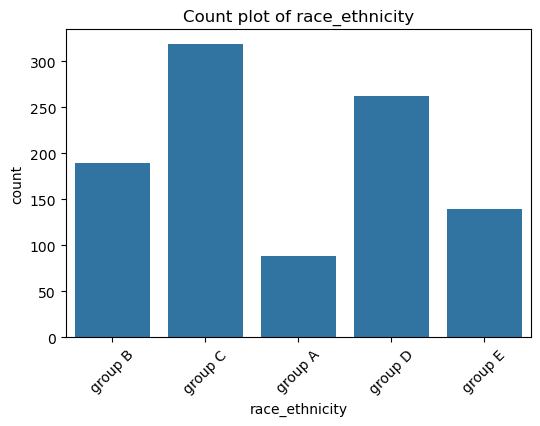

Value counts for parental_education:
parental_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64


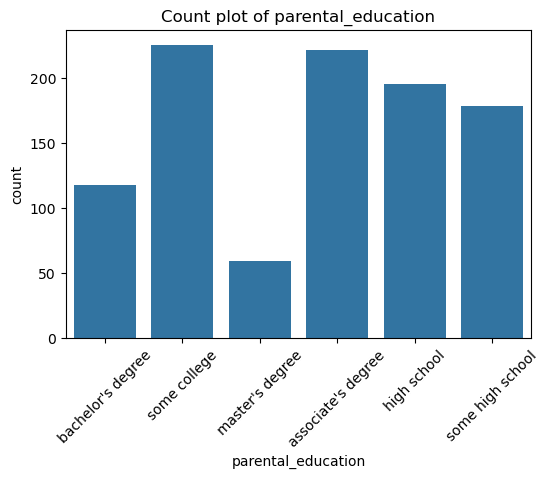

Value counts for lunch:
lunch
standard        645
free/reduced    355
Name: count, dtype: int64


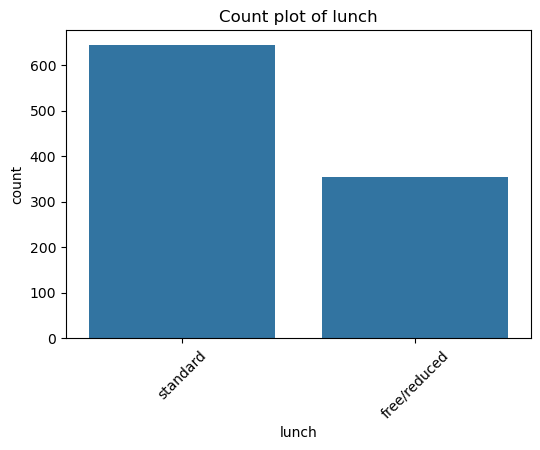

Value counts for test_preparation:
test_preparation
none         642
completed    358
Name: count, dtype: int64


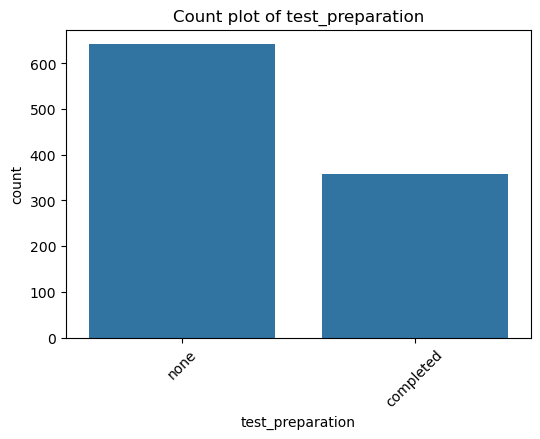

Value counts for alcohol_consumption:
alcohol_consumption
Moderate    532
Low         459
High          9
Name: count, dtype: int64


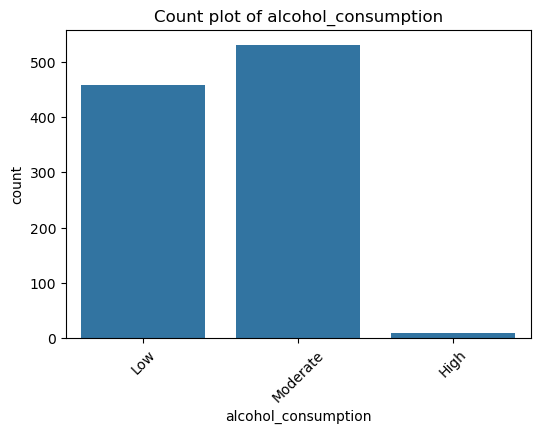

Value counts for family_support:
family_support
No     541
Yes    459
Name: count, dtype: int64


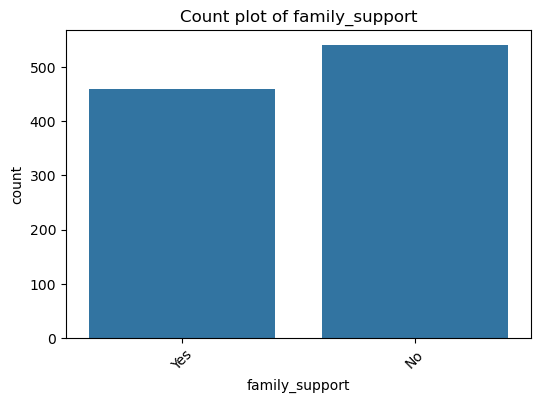

Value counts for internet_access:
internet_access
Yes    715
No     285
Name: count, dtype: int64


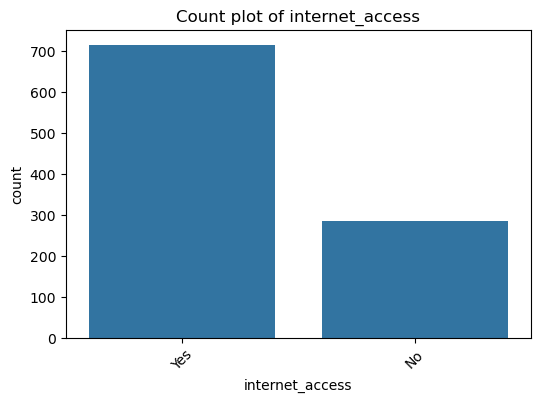

Value counts for grade:
grade
C    261
D    256
E    182
B    146
F    103
A     52
Name: count, dtype: int64


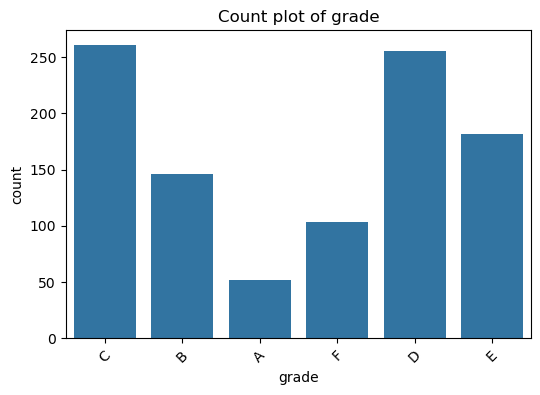

In [21]:
# for categorical columns:

categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())

    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df)
    plt.title(f'Count plot of {col}')
    plt.xticks(rotation=45)
    plt.show()

## Bivariate Analysis:


\Correlation Matrix:
                    math_score  reading_score  writing_score  average_score  \
math_score            1.000000       0.817580       0.802642       0.918744   
reading_score         0.817580       1.000000       0.954598       0.970331   
writing_score         0.802642       0.954598       1.000000       0.965669   
average_score         0.918744       0.970331       0.965669       1.000000   
avg_studytime(hrs)    0.853667       0.907256       0.903056       0.933150   
absent_percent       -0.794766      -0.847244      -0.840058      -0.869404   

                    avg_studytime(hrs)  absent_percent  
math_score                    0.853667       -0.794766  
reading_score                 0.907256       -0.847244  
writing_score                 0.903056       -0.840058  
average_score                 0.933150       -0.869404  
avg_studytime(hrs)            1.000000       -0.879491  
absent_percent               -0.879491        1.000000  


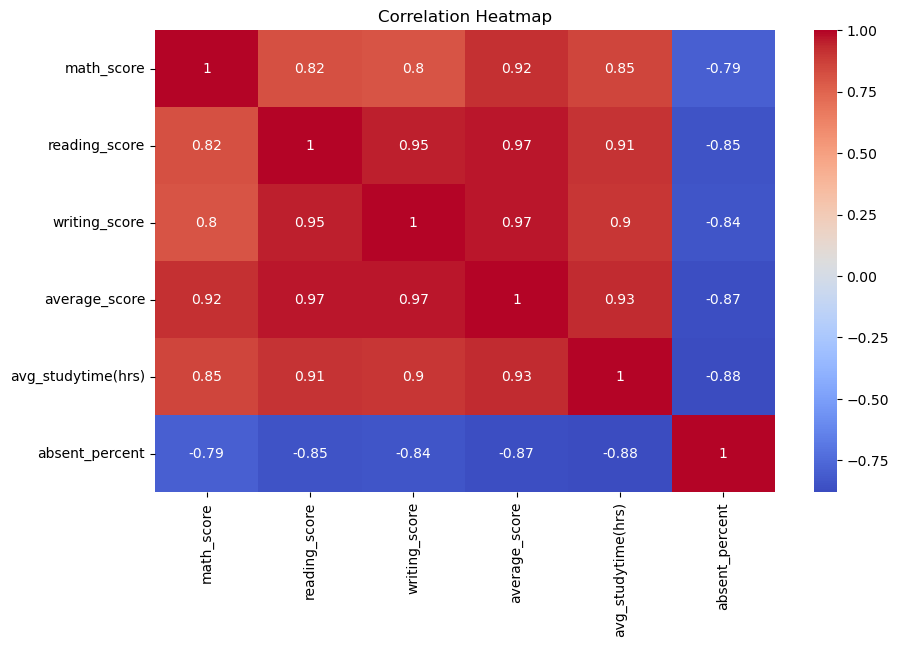

In [22]:
# Numerical vs Numerical
print("\Correlation Matrix:")
print(df[numeric_cols].corr())

plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

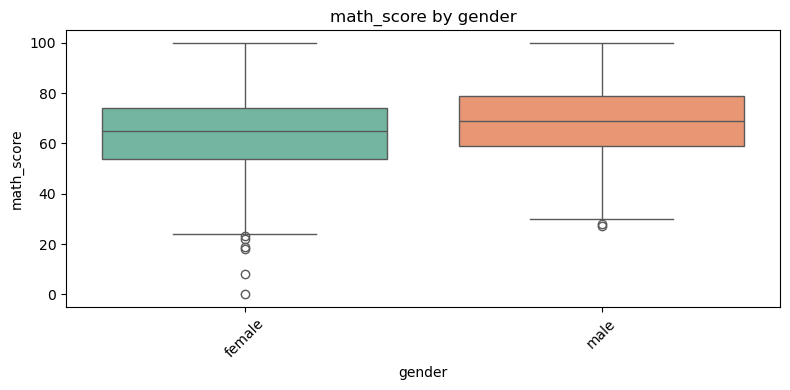

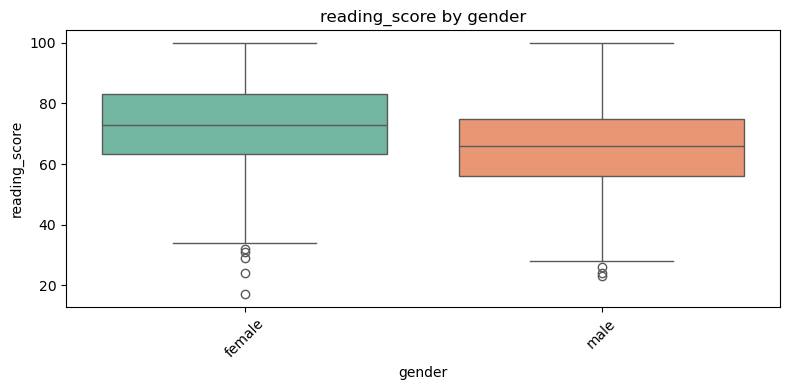

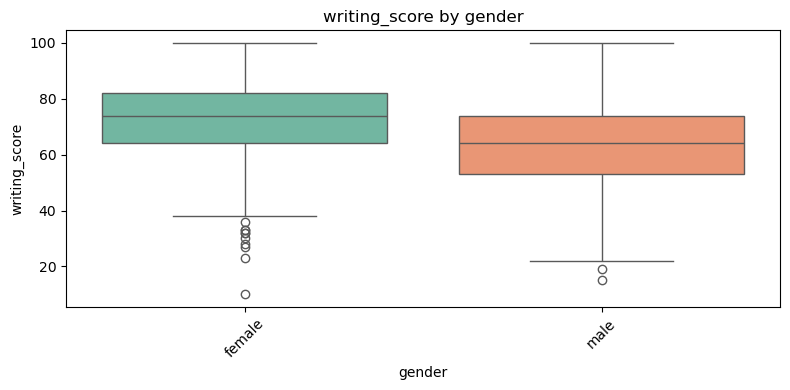

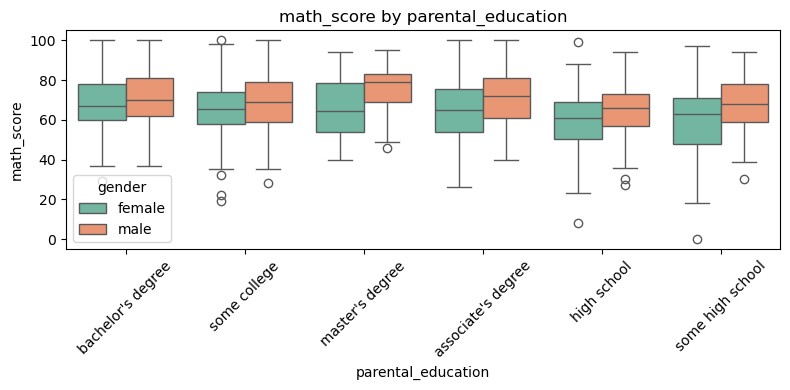

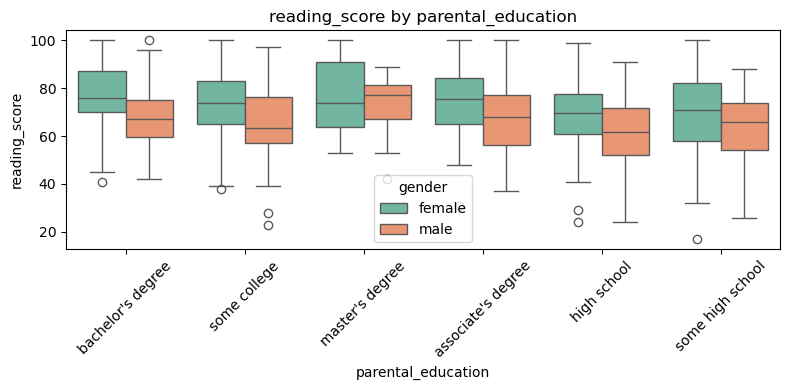

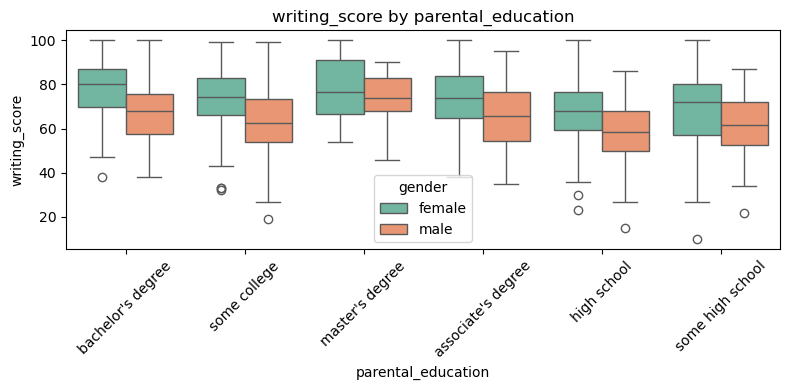

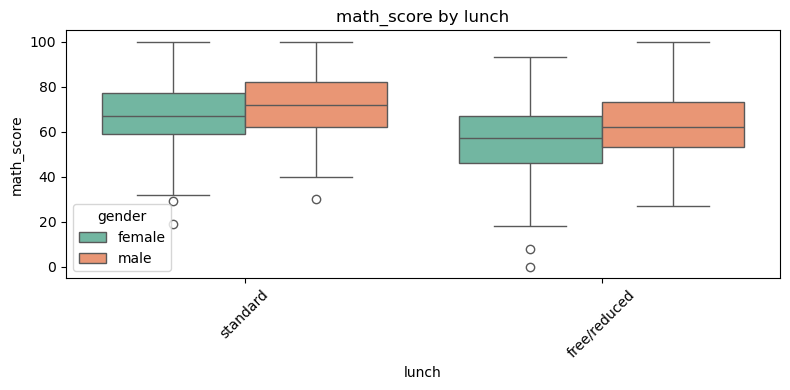

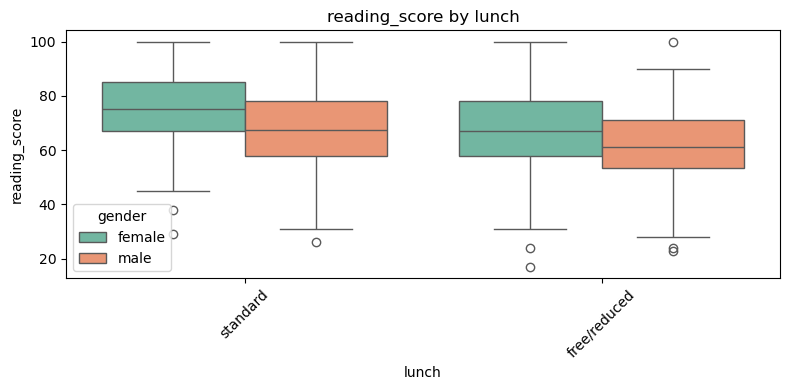

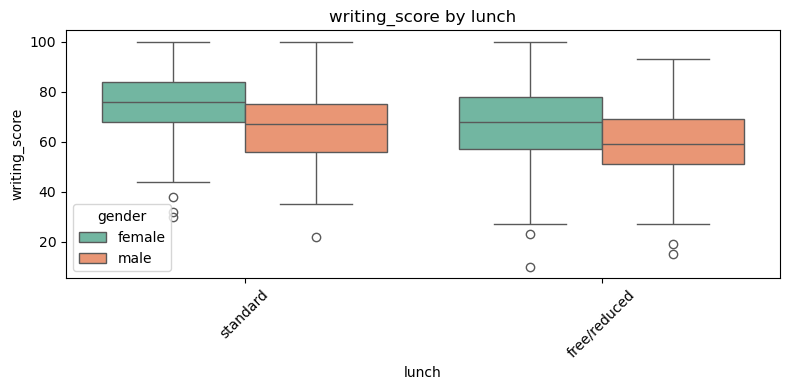

In [23]:
# Numerical vs Categorical:
selected_cats = ['gender', 'parental_education', 'lunch']
selected_nums = ['math_score', 'reading_score', 'writing_score']

for cat in selected_cats:
    for num in selected_nums:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=cat, y=num, hue='gender', data=df, palette='Set2')
        plt.title(f'{num} by {cat}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


Crosstab 
lunch   free/reduced  standard
gender                        
female           189       329
male             166       316


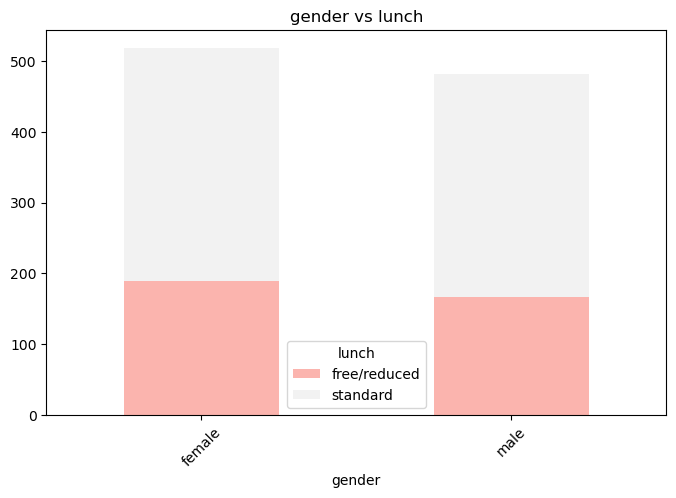

In [24]:
# Categorical vs Categorical

cat1 = 'gender'
cat2 = 'lunch'

cross_tab = pd.crosstab(df[cat1], df[cat2])
print(f"Crosstab ")
print(cross_tab)

cross_tab.plot(kind='bar', stacked=True, figsize=(8,5), colormap='Pastel1')
plt.title(f'{cat1} vs {cat2}')
plt.xticks(rotation=45)
plt.show()


# Visualization

In [25]:
df = pd.read_csv('cleaned_std_perf.csv')
df.head()

,gender,race_ethnicity,parental_education,lunch,test_preparation,math_score,reading_score,writing_score,average_score,alcohol_consumption,family_support,internet_access,avg_studytime(hrs),grade,absent_percent
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67,Low,Yes,Yes,6,C,15
1,female,group C,some college,standard,completed,69,90,88,82.33,Low,Yes,Yes,6,B,16
2,female,group B,master's degree,standard,none,90,95,93,92.67,Low,Yes,Yes,8,A,2
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33,Moderate,No,No,2,F,37
4,male,group C,some college,standard,none,76,78,75,76.33,Low,Yes,Yes,6,C,13


### Histogram of Grades

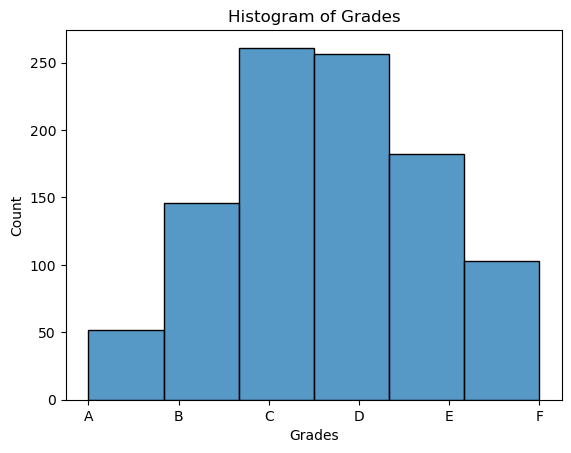

In [26]:
grade_map = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6}
df['grade_numeric'] = df['grade'].map(grade_map)

sns.histplot(df['grade_numeric'], bins=6)
plt.xlabel("Grades")
plt.title("Histogram of Grades")
plt.xticks(ticks=[1, 2, 3, 4, 5, 6], labels=['A', 'B', 'C', 'D', 'E', 'F'])
plt.show()

### Bar plots comparing male vs female performance

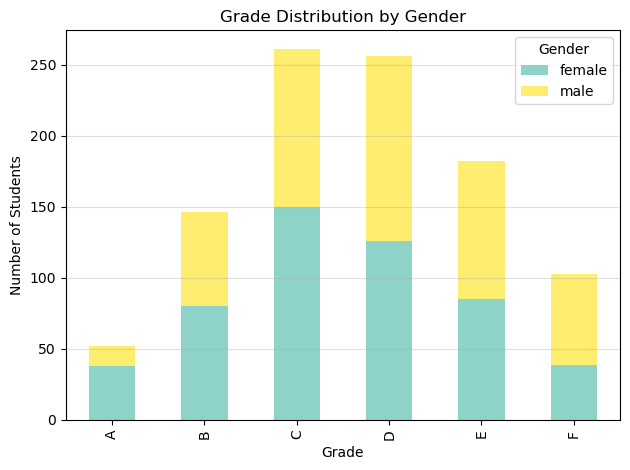

In [27]:
grade_gender_counts = df.groupby('grade')['gender'].value_counts().unstack()

grade_order = ['A', 'B', 'C', 'D', 'E', 'F']
grade_gender_counts = grade_gender_counts.reindex(grade_order)

grade_gender_counts.plot(kind='bar', stacked=True, cmap='Set3')
plt.xlabel('Grade')
plt.ylabel('Number of Students')
plt.title('Grade Distribution by Gender')
plt.legend(title='Gender')
plt.grid(axis='y', alpha=0.4)
plt.tight_layout()
plt.show()

### Line chart of grades vs study time

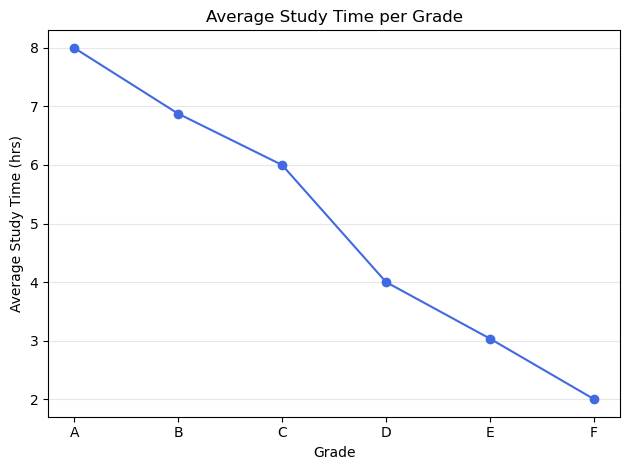

In [28]:
grade_order = ['A', 'B', 'C', 'D', 'E', 'F']

avg_study = df.groupby('grade')['avg_studytime(hrs)'].mean().reindex(grade_order)

avg_study.plot(kind='line', marker='o', color='royalblue')
plt.xlabel('Grade')
plt.ylabel('Average Study Time (hrs)')
plt.title('Average Study Time per Grade')
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### Heatmap of correlations between academic and personal attributes

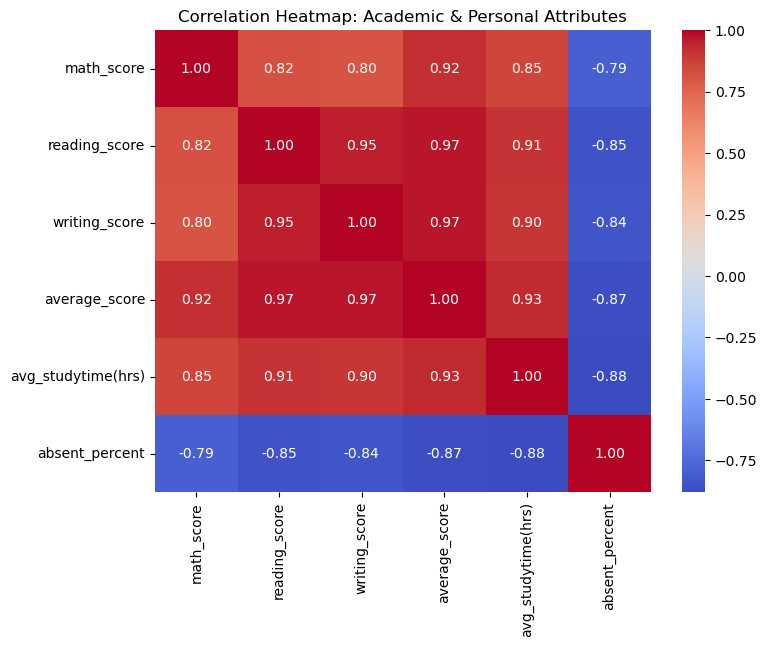

In [29]:
numeric_cols = [
    'math_score', 'reading_score', 'writing_score',
    'average_score', 'avg_studytime(hrs)', 'absent_percent'
]

corr = df[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap: Academic & Personal Attributes")
plt.show()

### Gender Distribution on the basis of alcohol consumption

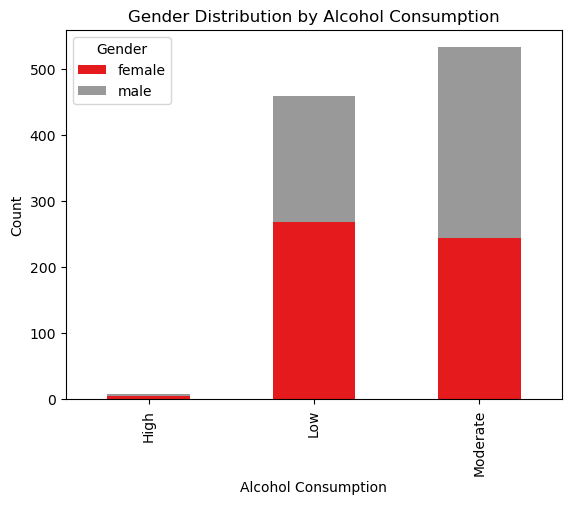

In [30]:
gender_dist = df.groupby('alcohol_consumption')['gender'].value_counts().unstack()

gender_dist.plot(kind='bar', stacked=True, cmap='Set1')
plt.title('Gender Distribution by Alcohol Consumption')
plt.ylabel('Count')
plt.xlabel('Alcohol Consumption')
plt.legend(title='Gender')
plt.show()

### Pie Distribution of students on the basis education level

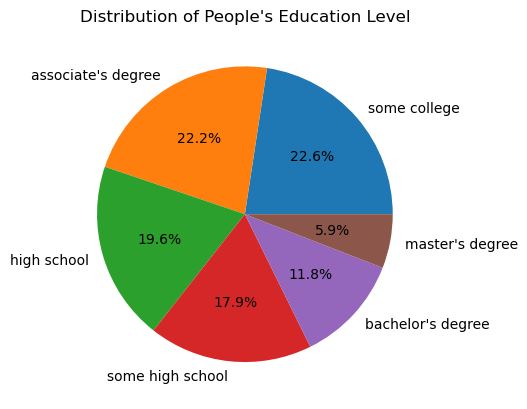

In [31]:
edu_level = df['parental_education'].value_counts()

plt.pie(edu_level, labels=edu_level.index ,autopct='%.1f%%')
plt.title("Distribution of People's Education Level")
plt.show()

# EDA Analysis

### Average Absence vs Grade

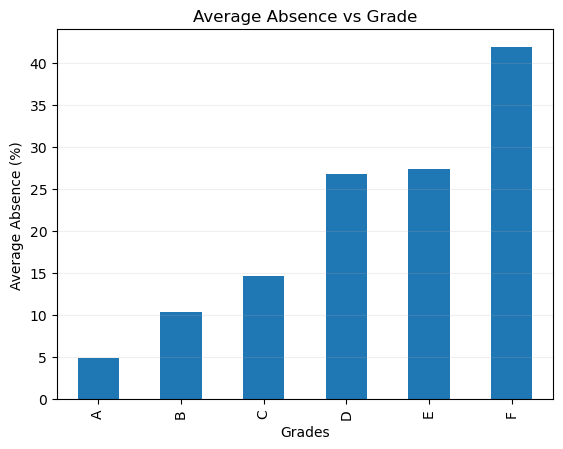

In [32]:
avg_absence = df.groupby('grade')['absent_percent'].mean()

avg_absence.plot(kind='bar')
plt.title('Average Absence vs Grade')
plt.xlabel('Grades')
plt.ylabel('Average Absence (%)')
plt.grid(True, axis='y', alpha= 0.2)
plt.show()

So as we can conclude following things :
1. The students with good scores low absence compared to students having bad scores.
2. Students should attend the classes on a daily basis in order to score good marks in the paper.

### Final Grades vs Internet Access

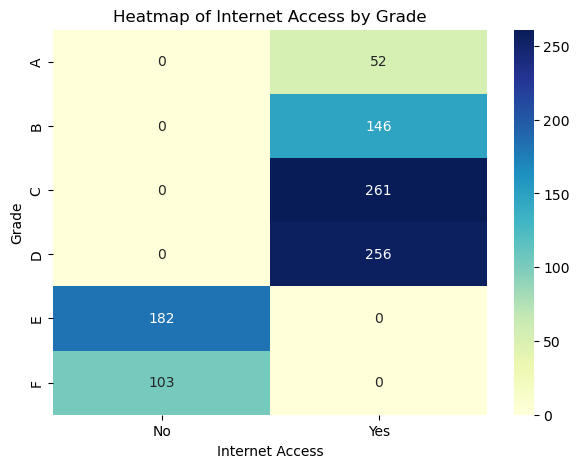

In [33]:
cross_tab = pd.crosstab(df['grade'], df['internet_access']).reindex(['A','B','C','D','E','F'])

plt.figure(figsize=(7,5))
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt='d')
plt.title("Heatmap of Internet Access by Grade")
plt.xlabel("Internet Access")
plt.ylabel("Grade")
plt.show()

So by the above heatmap we can say that most of the students having internet access score average marks while the students scoring higher marks are either do not have internet or they usage of internet is limited.

So we can conclude that :
1. People having low grades spend most of their time on internet for surfing social media.
2. People scoring high grades restrict themselves from using excessive amount of internet.

### Final Grade vs Family Support

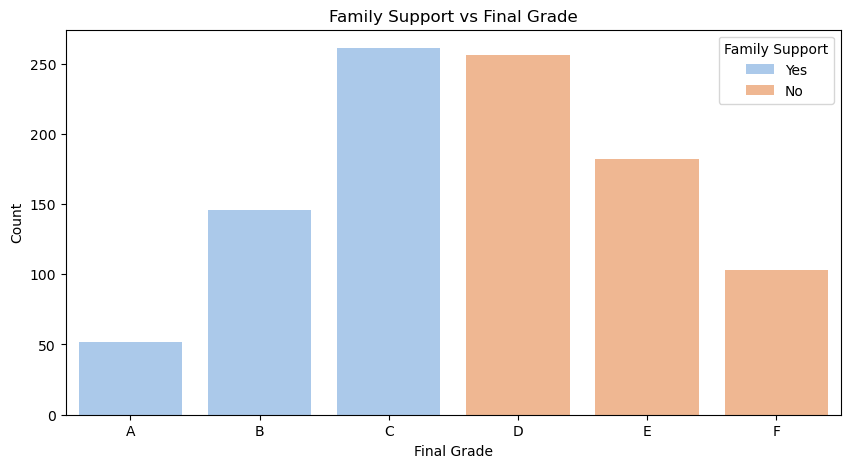

In [34]:
plt.figure(figsize=(10,5))
sns.countplot(x='grade', hue='family_support', data=df, palette='pastel', order=['A', 'B', 'C', 'D', 'E', 'F'])
plt.title('Family Support vs Final Grade')
plt.xlabel('Final Grade')
plt.ylabel('Count')
plt.legend(title='Family Support')
plt.show()

So by the above bar graph we can generate the insight that people having family support score good or moderate grades, while the people without family support score below average grades in the tests.

We can conclude that :
1. Students having family support do not have to worry about other essential needs.
2. Those who do not have family support have to work harder than other students.

### Final Grade vs Alcohol Consumption

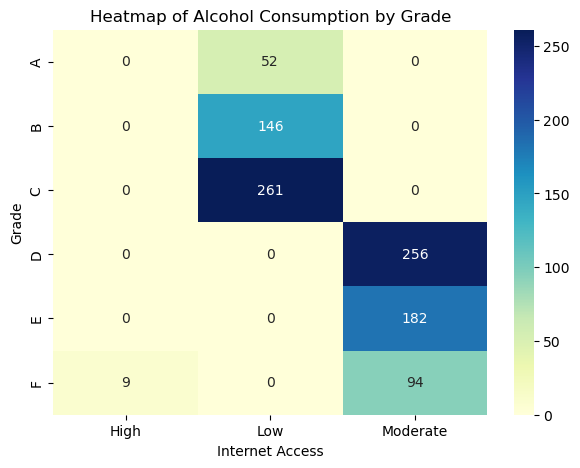

In [36]:
cross_tab = pd.crosstab(df['grade'], df['alcohol_consumption']).reindex(['A','B','C','D','E','F'])

plt.figure(figsize=(7,5))
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt='d')
plt.title("Heatmap of Alcohol Consumption by Grade")
plt.xlabel("Internet Access")
plt.ylabel("Grade")
plt.show()

So here we can see that most of the people scoring good or above average marks consume less or none amount of alcohol while the people having bad scores or below average they consume more alcohol.

We can conclude that :
1. Students should not consume alcohol or else if they are trying to consume they should consume in less amount.
2. Students should focus on their career rather than acquiring bad habits.